In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Correlation matrix among all the features given in the dataset**

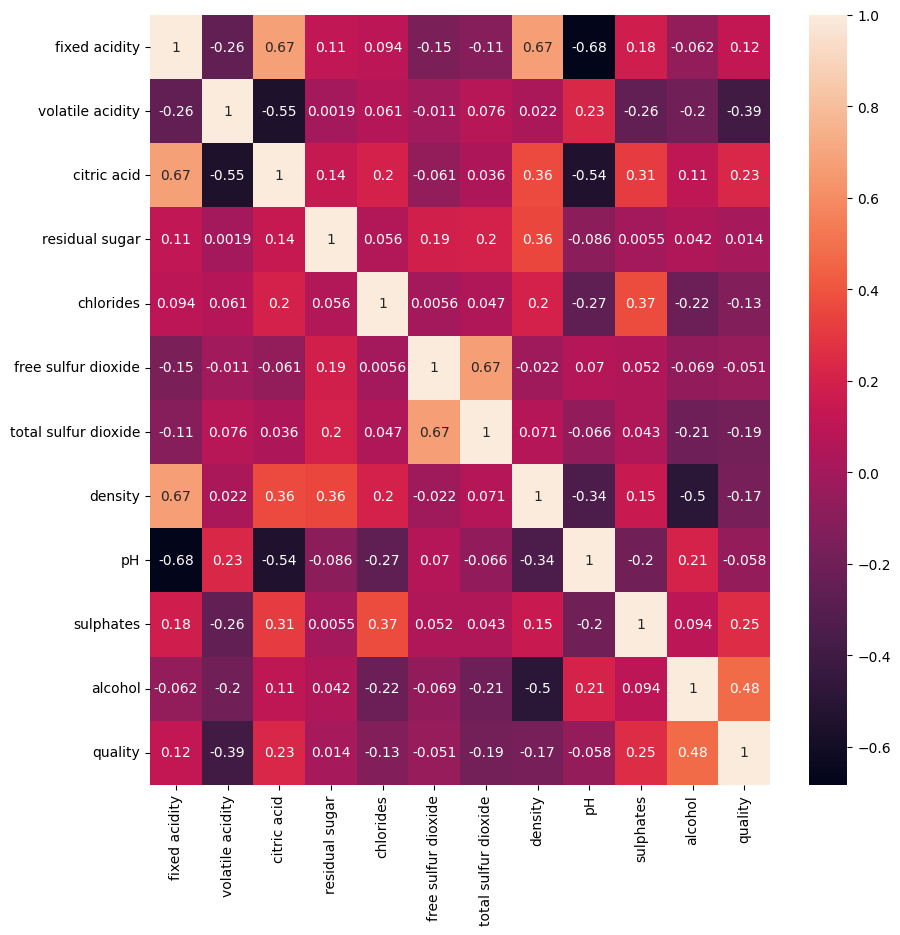

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.savefig('corr.png')
plt.show()


**Detection of outliers using z score**

if z>3=>this is an outlier

In [11]:
from scipy import stats
z=np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [12]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

Remove those records with z>3(outliers)

In [13]:
new_data=data[(z<3).all(axis=1)]
new_data.shape

(1451, 12)

In [14]:
x=new_data.drop('quality',axis=1)
y=new_data['quality']


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

data modelling using random forest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

**Prediction**

In [23]:
y_pred=model.predict(x_test)
y_pred

array([6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 7, 6, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 7, 7, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 7,
       6, 6, 6, 7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 7, 7, 5, 5, 5, 5, 5, 7,
       6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5, 5, 7, 5, 6, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 7, 5, 7, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5,
       5, 6, 6, 6, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 5, 5,
       5, 6, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 7, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 6, 6, 6, 5])

Data evaluation on metrics

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7147766323024055
[[  0   6   5   0   0]
 [  0 101  27   0   0]
 [  0  21  86   2   0]
 [  0   2  19  21   0]
 [  0   0   1   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.78      0.79      0.78       128
           6       0.62      0.79      0.70       109
           7       0.91      0.50      0.65        42
           8       0.00      0.00      0.00         1

    accuracy                           0.71       291
   macro avg       0.46      0.42      0.43       291
weighted avg       0.71      0.71      0.70       291



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


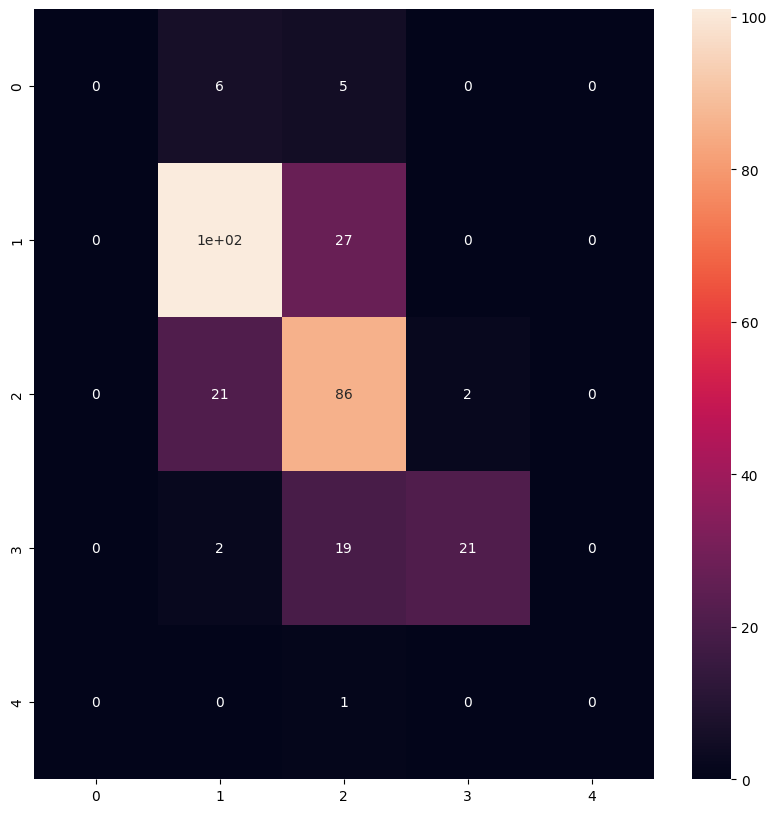

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.savefig('cm.png')

accuracy =71% ,we can do hyperparameter tuning usung gridsearchCV

[Text(0.5395612551072523, 0.975, 'x[10] <= 10.15\ngini = 0.632\nsamples = 748\nvalue = [33, 505, 469, 140, 13]'),
 Text(0.3341340015321757, 0.925, 'x[0] <= 10.35\ngini = 0.508\nsamples = 375\nvalue = [21, 362, 182, 14, 0]'),
 Text(0.2627521705822268, 0.875, 'x[4] <= 0.098\ngini = 0.478\nsamples = 346\nvalue = [20, 352, 155, 6, 0]'),
 Text(0.1485891215526047, 0.825, 'x[10] <= 9.15\ngini = 0.506\nsamples = 305\nvalue = [19, 289, 151, 6, 0]'),
 Text(0.03575076608784474, 0.775, 'x[2] <= 0.29\ngini = 0.568\nsamples = 24\nvalue = [4, 12, 20, 0, 0]'),
 Text(0.02247191011235955, 0.725, 'x[6] <= 32.0\ngini = 0.416\nsamples = 15\nvalue = [4, 2, 17, 0, 0]'),
 Text(0.012257405515832482, 0.675, 'x[4] <= 0.081\ngini = 0.375\nsamples = 3\nvalue = [3, 1, 0, 0, 0]'),
 Text(0.008171603677221655, 0.625, 'x[9] <= 0.47\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0, 0]'),
 Text(0.0040858018386108275, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.012257405515832482, 0.575, 'gini = 0.0\n

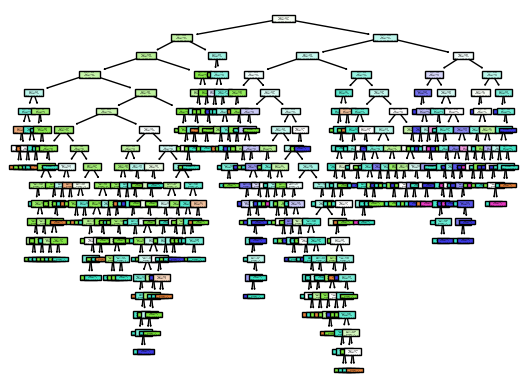

In [27]:
from sklearn import tree
tree.plot_tree(model.estimators_[0],filled=True)

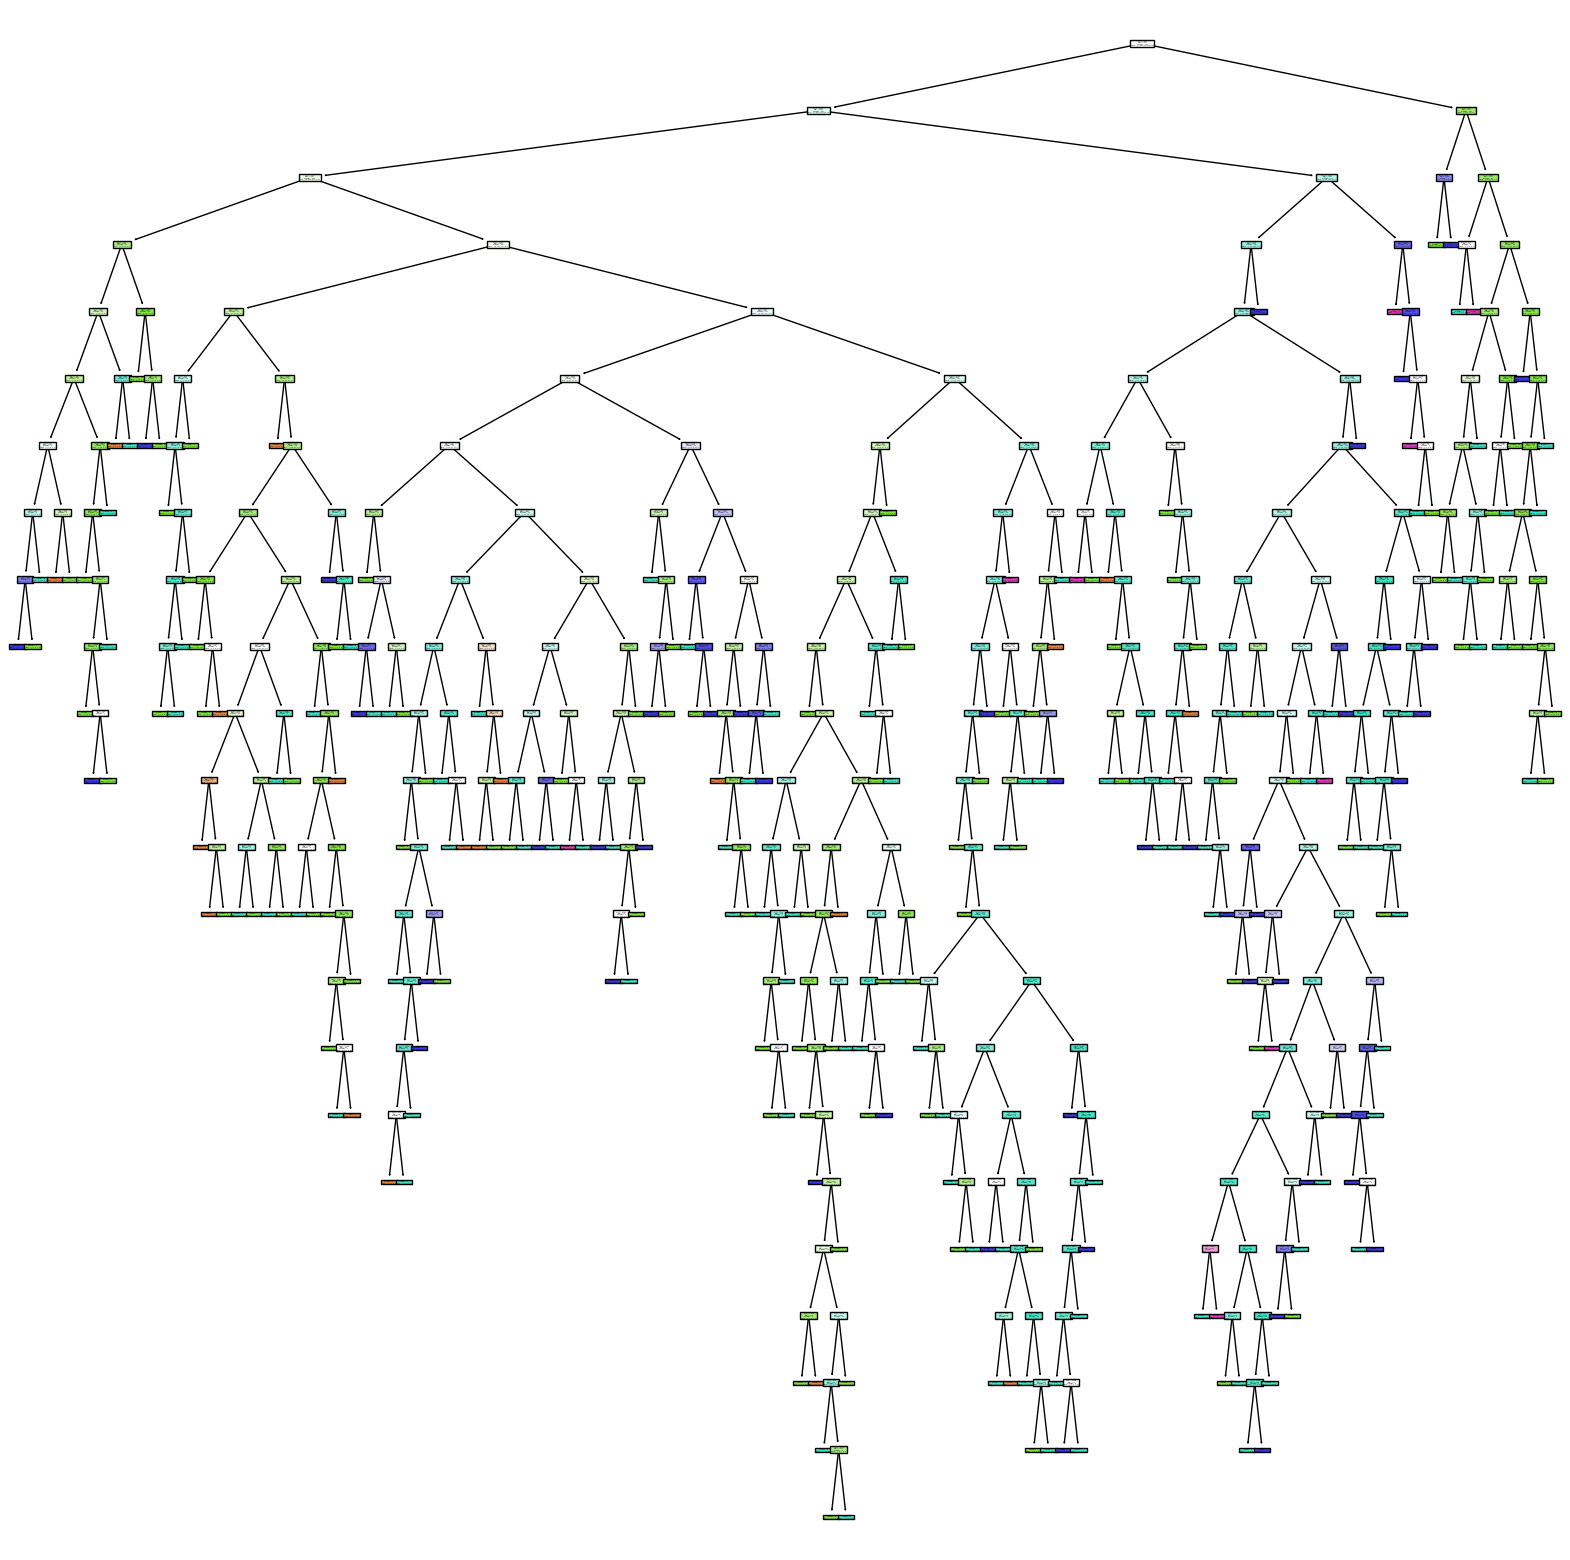

In [29]:
plt.figure(figsize=(20,20))
for i in range(len(model.estimators_)):
  tree.plot_tree(model.estimators_[i],filled=True)


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [32]:
grid.best_params_

{'n_estimators': 50}

In [34]:
acc=grid.score(x_test,y_test)
print(acc)

0.7079037800687286
